## Standardization

In [1]:
from sklearn.preprocessing import StandardScaler
data = [[0,0],[0,0],[1,1],[1,1]]
scaler = StandardScaler()
print(scaler.fit(data))
StandardScaler()
print(scaler.mean_)

StandardScaler()
[0.5 0.5]


In [2]:
print(scaler.transform(data))

[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]


In [3]:
print(scaler.transform([[2,2]]))

[[3. 3.]]


## Normalization

In [4]:
from sklearn.preprocessing import normalize
x = [[2,1,2],[1,0,1]]
normalize(x, norm = "l1")

array([[0.4, 0.2, 0.4],
       [0.5, 0. , 0.5]])

In [5]:
normalize(x, norm = "l2")

array([[0.66666667, 0.33333333, 0.66666667],
       [0.70710678, 0.        , 0.70710678]])

## Minmax_scale

In [6]:
from sklearn.preprocessing import minmax_scale  #it perform operation row wise
x = [[-2,1,2],[-1,0,1]]
minmax_scale(x, axis = 0)

array([[0., 1., 1.],
       [1., 0., 0.]])

In [7]:
minmax_scale(x, axis=1)

array([[0.  , 0.75, 1.  ],
       [0.  , 0.5 , 1.  ]])

## K means Clustering

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [9]:
dataset = pd.read_csv(r"C:\Users\admin\Desktop\Machine learning\Day-12\Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [10]:
X = dataset.iloc[:, [3,4]].values
y = dataset.iloc[:,3].values

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 1)


In [12]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1,1))

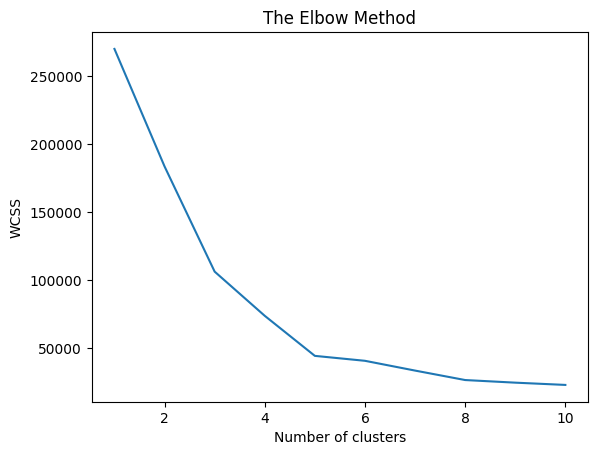

In [14]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
                    

In [15]:
kmeans = KMeans(n_clusters = 5,init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

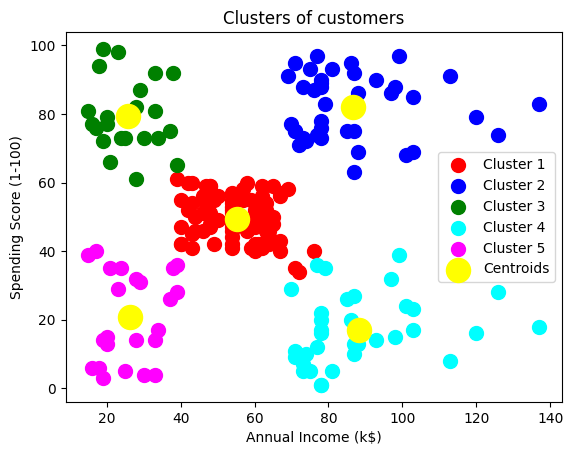

In [16]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Hierachical Clustering

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
dataset = pd.read_csv(r"C:\Users\admin\Desktop\Machine learning\Day-12\Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [19]:
X = dataset.iloc[:, [3,4]].values
y = dataset.iloc[:,3].values

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 1)


In [21]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1,1))

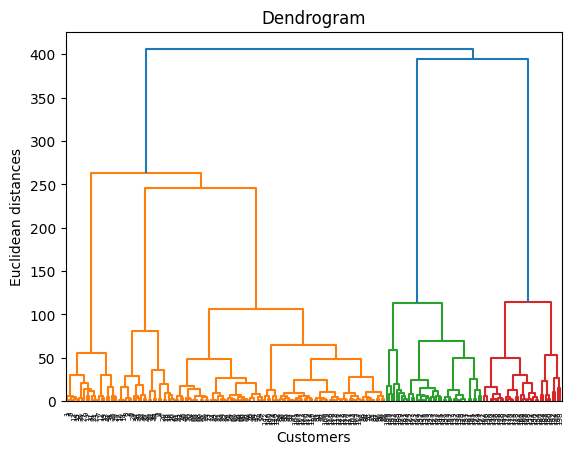

In [22]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [25]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

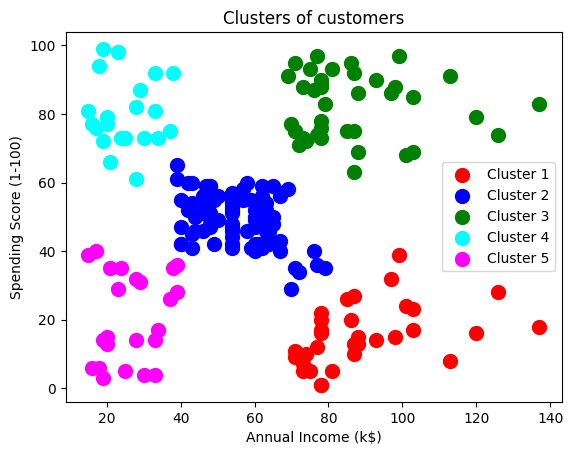

In [26]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
## write a simple program in python to move all the zeros at end of the string while maintaing the correct order in the element in the array.(without built-in function)

In [32]:
def move_zeros_to_end(arr):
    position = 0
    
    for i in range(len(arr)):
        if arr[i] != 0:
            arr[position] = arr[i]
            position += 1
    
    while position < len(arr):
        arr[position] = 0
        position += 1
    
    return arr

arr = [0, 1, 0, 3, 12]
print("Original array:", arr)
result = move_zeros_to_end(arr)
print("Array after moving zeros to end:", result)

Original array: [0, 1, 0, 3, 12]
Array after moving zeros to end: [1, 3, 12, 0, 0]


In [46]:
# Write a simple python program in string to replace all the vowels to the capital letters(without built-in function)

def vowels(input_string):
    vowels = "aeiou"
    result = ""
    
    for char in input_string:
        if char in vowels:
            result += char.upper()
        else:
            result += char
    
    return result

str1 = "machine"
str2 = vowels(str1)
print(str2)  

mAchInE


In [51]:
## write a simple program in python to find maximum of summation from sublist in contionus fashion.(without built-in function)(take input from user)


In [78]:
 def max_sublist_sum(arr):
    max_sum = float('-inf')
    current_sum = 0
    
    for num in arr:
        current_sum += num
        
        if current_sum > max_sum:
            max_sum = current_sum
        
        if current_sum < 0:
            current_sum = 0
    
    return max_sum

arr = [5,10,15,16,17]
print("Maximum sublist sum is :", max_sublist_sum(arr))


Maximum sublist sum is : 63
